In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
data = pd.read_csv("index.csv")
data.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [23]:
new_data = data.drop(['ID','Gender','Bedtime','Wakeup_time'],axis="columns")
new_data.head()

,Age,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,69,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


changing yes/no into 1/0

In [24]:
new_data['Smoking_status']=new_data['Smoking_status'].map({'Yes': 1, 'No': 0})

In [25]:
new_data.head()

,Age,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,69,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,6.0,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


<AxesSubplot: >

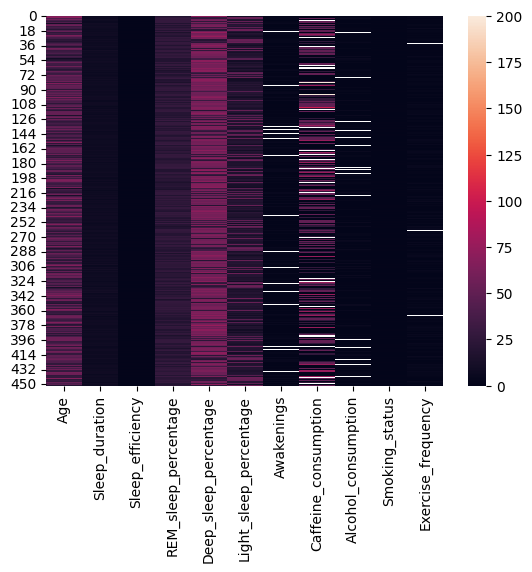

In [26]:
sns.heatmap(new_data)

There are lots of Nan values

In [29]:
clean_data = new_data.dropna()
clean_data.head()

,Age,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,65,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,69,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,6.0,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


<AxesSubplot: >

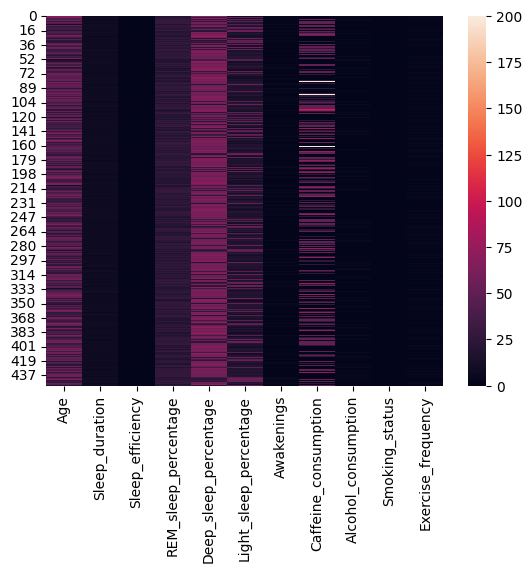

In [30]:
sns.heatmap(clean_data)

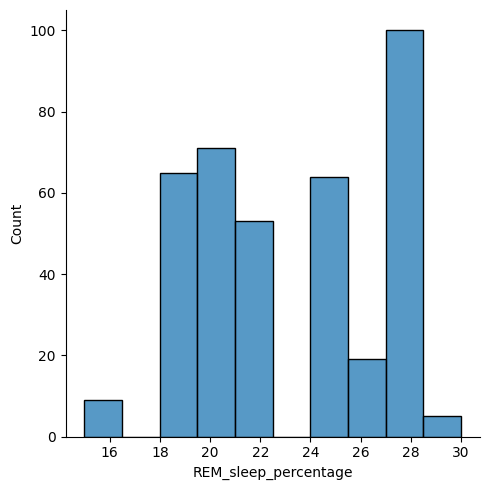

In [31]:
sns.displot(clean_data['REM_sleep_percentage'])

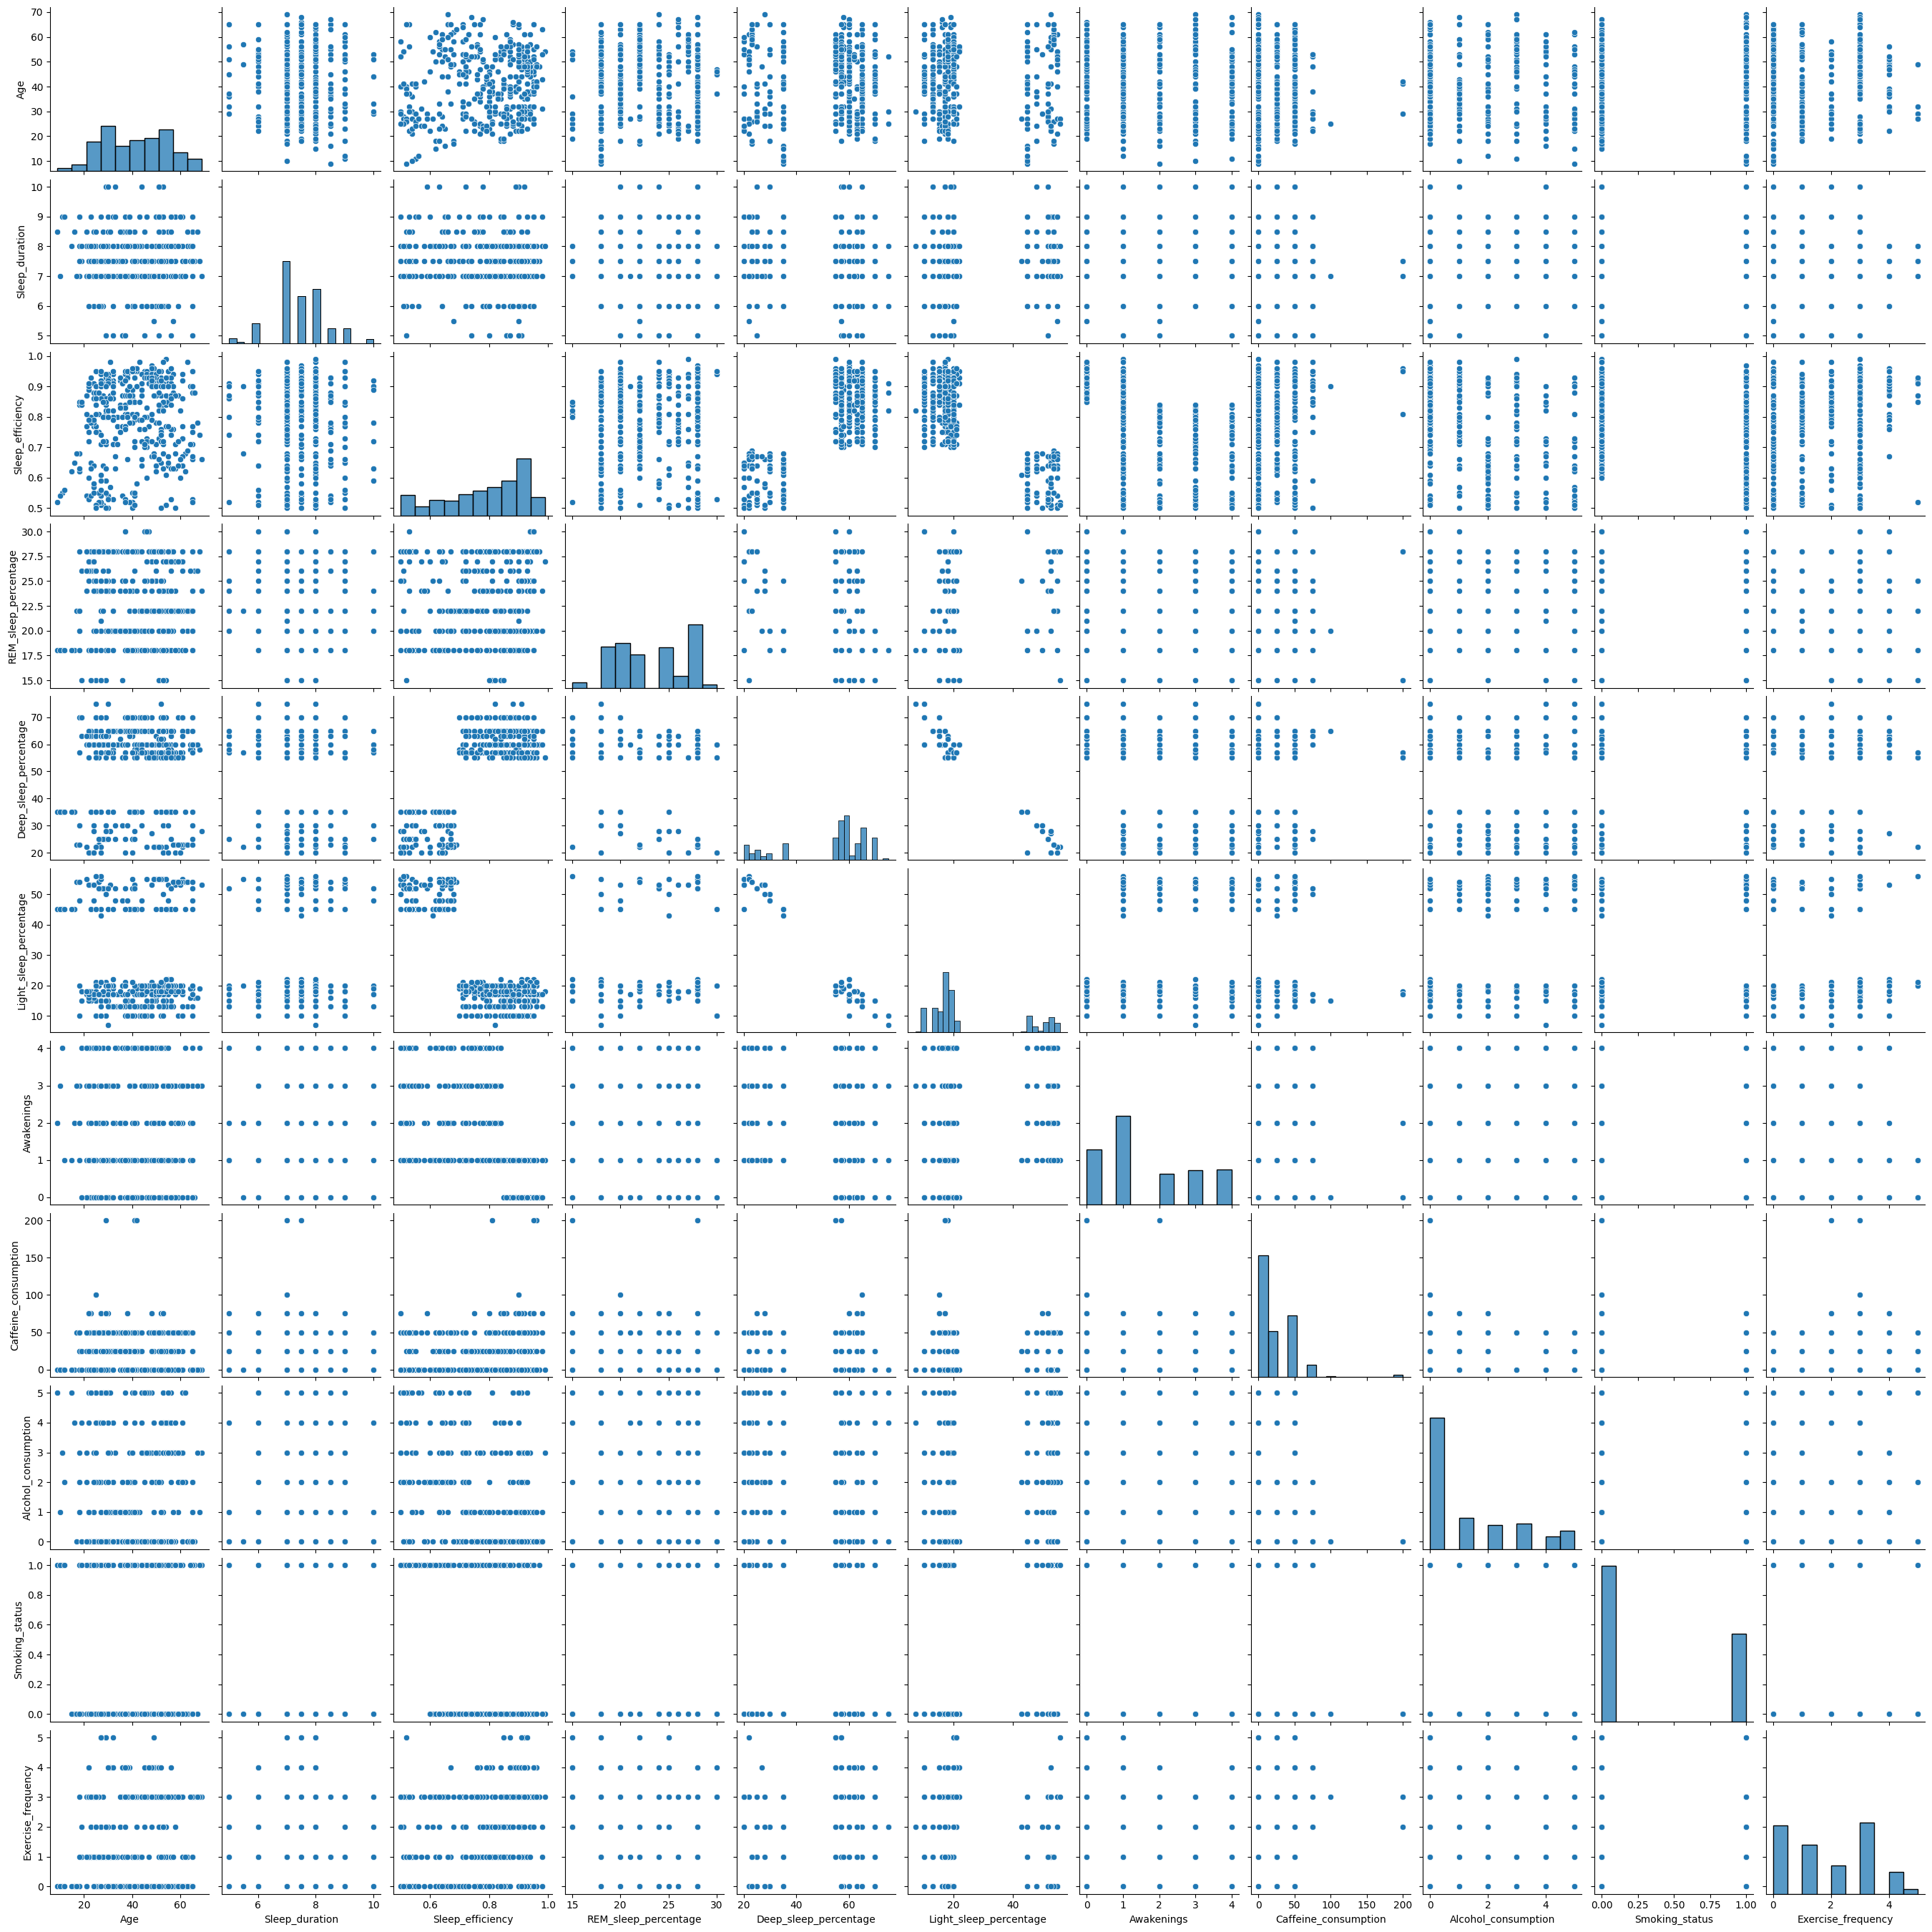

In [32]:
sns.pairplot(clean_data)

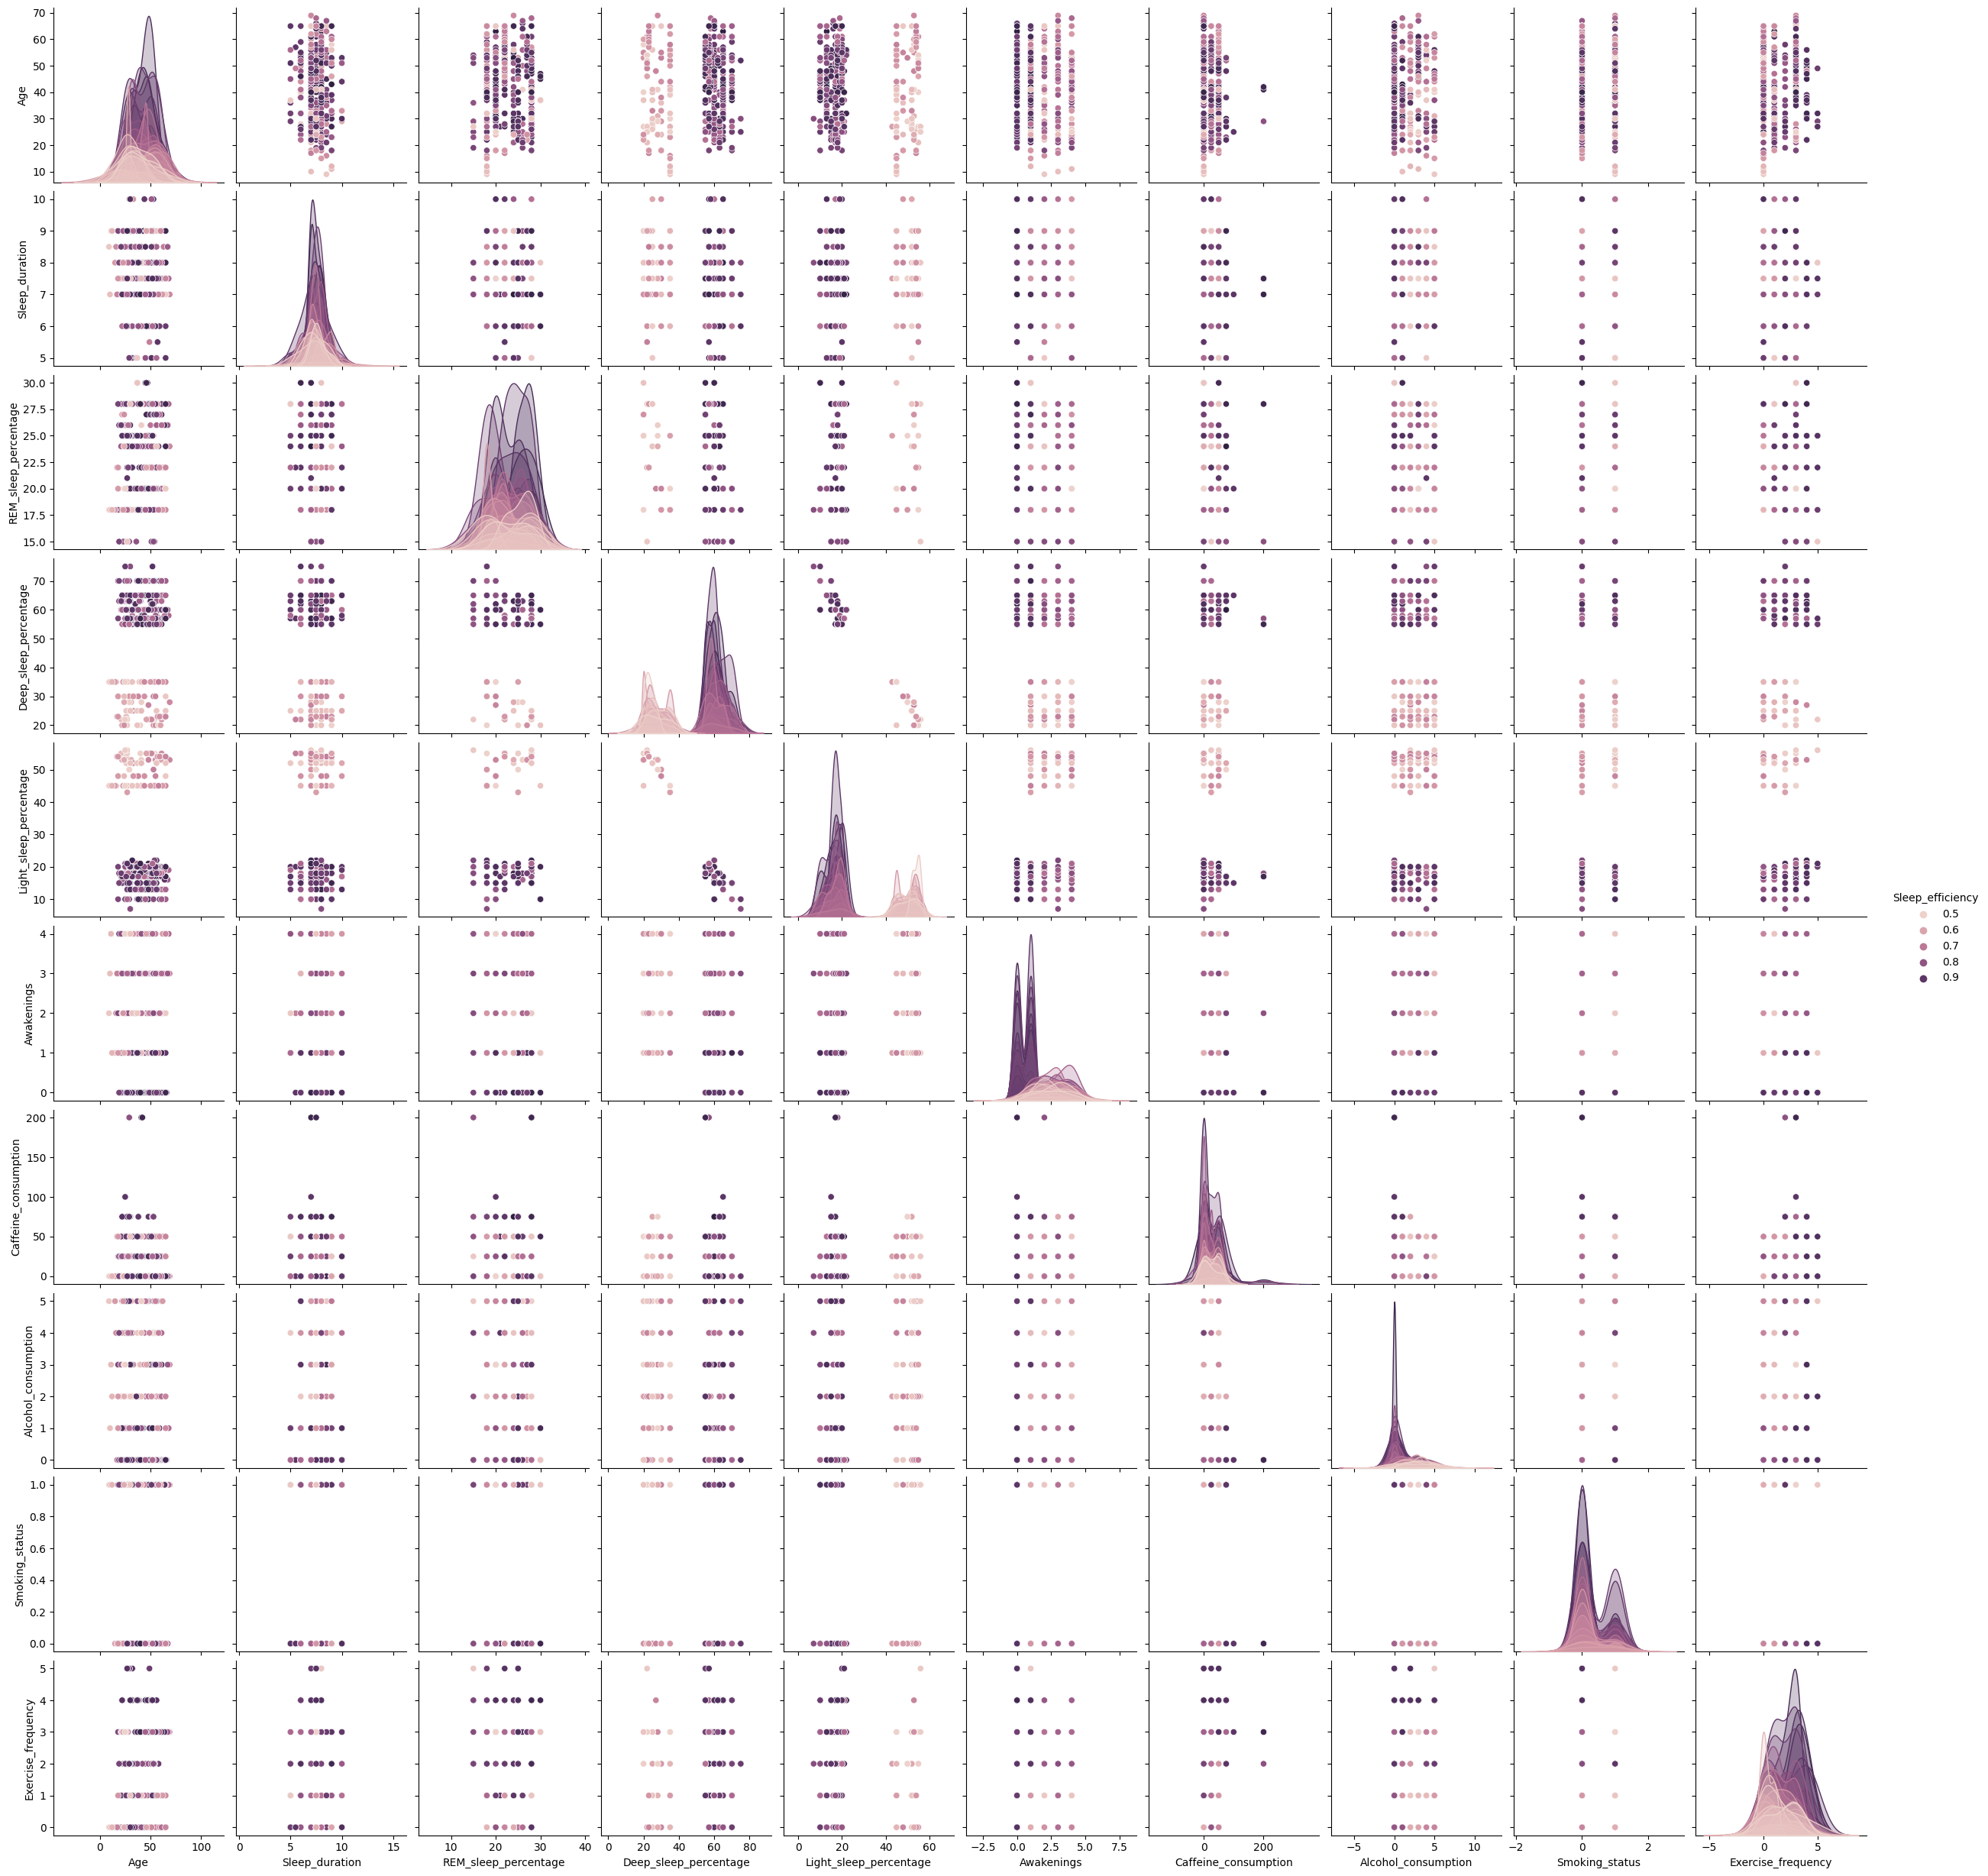

In [33]:
sns.pairplot(clean_data,hue="Sleep_efficiency")

In [35]:
x = clean_data.drop(['Sleep_efficiency'],axis="columns")
y = clean_data.Sleep_efficiency

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression,Line
from sklearn.metrics import mean_squared_error

In [41]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_predicted = model.predict(x_test)
mse = mean_squared_error(y_test,y_predicted)

In [45]:
print("The Mean Squared Error is: ",mse)

The Mean Squared Error is:  0.003363400383159395


In [47]:
print(model.predict([[18,7.5,22,23,54,1.0,50.0,1.0,0,1.0]]))

[0.65172703]


c:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
